In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
column_names = ['vendor', 'model', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX','PRP', 'ERP']
df = pd.read_csv('machine_original.csv', header=None, names=column_names)

In [4]:
df.head()

,vendor,model,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [5]:
df.info

<bound method DataFrame.info of       vendor          model  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser          32/60   125   256   6000   256     16    128  198  199
1     amdahl         470v/7    29  8000  32000    32      8     32  269  253
2     amdahl        470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl        470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl        470v/7c    29  8000  16000    32      8     16  132  132
..       ...            ...   ...   ...    ...   ...    ...    ...  ...  ...
204   sperry           80/8   124  1000   8000     0      1      8   42   37
205   sperry  90/80-model-3    98  1000   8000    32      2      8   46   50
206   sratus             32   125  2000   8000     0      2     14   52   41
207     wang         vs-100   480   512   8000    32      0      0   67   47
208     wang          vs-90   480  1000   4000     0      0      0   45   25

[209 rows x 10 columns]>

In [7]:
df.isnull

<bound method DataFrame.isnull of       vendor          model  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser          32/60   125   256   6000   256     16    128  198  199
1     amdahl         470v/7    29  8000  32000    32      8     32  269  253
2     amdahl        470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl        470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl        470v/7c    29  8000  16000    32      8     16  132  132
..       ...            ...   ...   ...    ...   ...    ...    ...  ...  ...
204   sperry           80/8   124  1000   8000     0      1      8   42   37
205   sperry  90/80-model-3    98  1000   8000    32      2      8   46   50
206   sratus             32   125  2000   8000     0      2     14   52   41
207     wang         vs-100   480   512   8000    32      0      0   67   47
208     wang          vs-90   480  1000   4000     0      0      0   45   25

[209 rows x 10 columns]>

In [8]:
features = df[['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX','PRP']]

In [9]:
target = df['ERP']

In [10]:
target.head()

0    199
1    253
2    253
3    253
4    132
Name: ERP, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
predictions = lr.predict(X_test)

In [17]:
from sklearn.metrics import  mean_squared_error, r2_score

In [18]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3007.8898321639435
R-squared: 0.9440465034138785


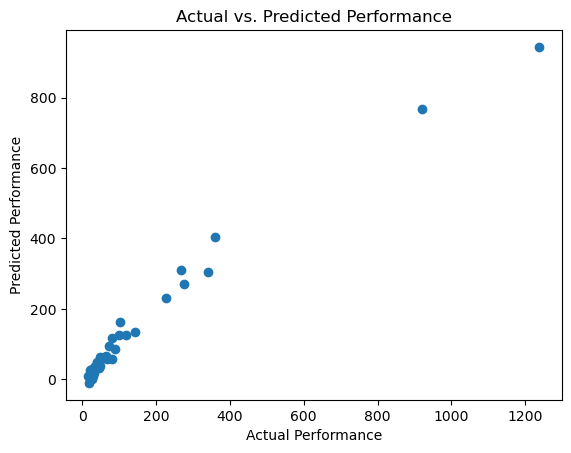

In [19]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Performance')
plt.ylabel('Predicted Performance')
plt.title('Actual vs. Predicted Performance')
plt.show()

## Bonus

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
features_df = pd.DataFrame(X_train_scaled, columns= ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX','PRP'])
target_df = pd.DataFrame(y_train)
hardware_df = pd.concat([features_df, target_df], axis =1)
hardware_df.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,-0.624967,1.551358,0.419613,0.176130,0.653103,-0.055738,0.826174,199.0
1,-0.677359,3.930080,1.898340,0.948268,0.653103,0.285849,2.636458,253.0
2,-0.662390,1.551358,4.855794,2.492545,1.348913,6.776010,7.576875,253.0
3,-0.381716,-0.530024,-0.689432,-0.596009,-0.216659,0.285849,-0.486462,253.0
4,-0.662390,3.930080,1.898340,5.581098,2.044723,0.285849,2.961011,132.0


<AxesSubplot:>

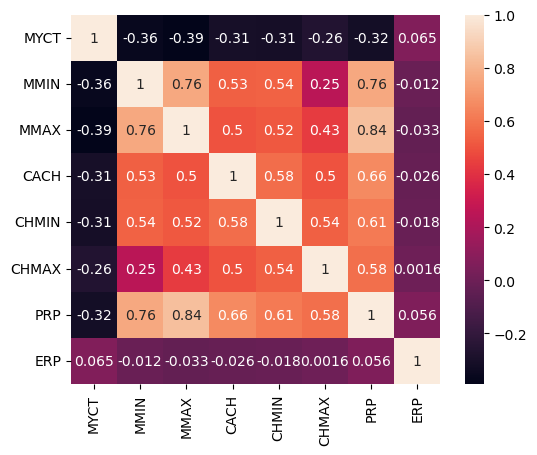

In [28]:
sns.heatmap(hardware_df.corr(), annot=True, square=True)